In [136]:
from lxml import etree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
%load_ext autoreload

In [15]:
%autoreload 2

In [53]:
import splab

In [64]:
splab041=splab.load('SPLab-041.xml')
r = splab041.groups[0].regions[0]

In [28]:
len(r.xmlregion)

11

In [31]:
r.xmlregion[0].text

'Region1'

In [32]:
r.xmlregion[1]

<Element struct at 0x102352708>

In [62]:
len(r.xmlregion[1])

18

In [67]:
r.param, len(r.param)

({'analysis_method': 'UPS',
  'analyzer_lens': 'WideAngleMode:40V',
  'analyzer_slit': '1:0.5x20\\2:open',
  'bias_voltage': -0.7,
  'curves_per_scan': 20,
  'detector_dataset': '20110824-WAM-05slit-03',
  'detector_dataset_directory': 'C:\\Program Files\\SPECS\\SpecsLab2\\database\\datasetCalib1d',
  'detector_voltage': 1350.0,
  'dwell_time': 1.0,
  'effective_workfunction': 4.414,
  'excitation_energy': 5.092,
  'kinetic_energy': 5.1,
  'kinetic_energy_base': 0.0,
  'num_scans': 1,
  'pass_energy': 1.0,
  'scan_delta': 0.01,
  'scan_mode': 'FixedAnalyzerTransmission',
  'values_per_curve': 211},
 18)

In [71]:
r.xmlregion[2].get('name'), r.xmlregion[3].get('name'), 

('mcd_head', 'mcd_tail')

In [74]:
r.xmlregion[4], len(r.xmlregion[4])

(<Element struct at 0x102354cc8>, 3)

In [76]:
r.xmlregion[4][0].text

'PHOIBOS HSA3500 CCD 100 R5[HWType 30:13] CCD'

In [79]:
len(r.xmlregion[4][1])

24

In [81]:
r.xmlregion[4][2], len(r.xmlregion[4][2] )

(<Element sequence at 0x102354bc8>, 0)

In [88]:
r.xmlregion[4].get('name')

'analyzer_info'

In [99]:
an= r.xmlregion.find('.//struct[@type_name="AnalyzerInfo"]')

In [103]:
an[0].text

'PHOIBOS HSA3500 CCD 100 R5[HWType 30:13] CCD'

## Now analyze counts section 

In [104]:
detectors= r.xmlregion.find('.//sequence[@type_name="DetectorSeq"]')

In [132]:
count = r.xmlregion.find('.//ulong[@type_name="Counts"]')

In [159]:
c=np.array([int(tmp) for tmp in r.xmlregion.find('.//ulong[@type_name="Counts"]').text.split()])

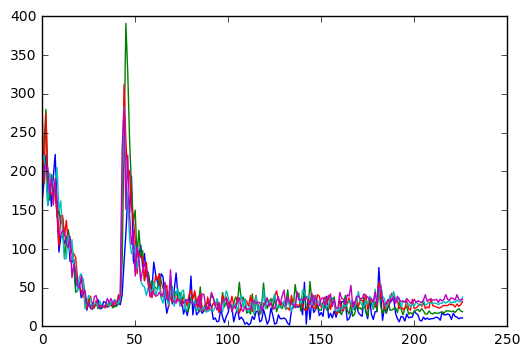

In [149]:
test1 = c[::24]
plt.plot(test1[:211+16])
plt.plot(test1[211+16:211*2+16*2])
plt.plot(test1[(211+16)*2:(211+16)*3])
plt.plot(test1[(211+16)*3:(211+16)*4])
plt.plot(test1[(211+16)*4:(211+16)*5])

In [170]:
test1[:211+16], len(test1[:211+16])

(array([161, 188, 221, 156, 183, 155, 194, 222, 153,  96, 116, 117, 107,
        114, 119,  84,  83,  87,  52,  60,  55,  37,  43,  42,  21,  30,
         24,  31,  26,  28,  35,  23,  23,  32,  31,  25,  26,  31,  26,
         27,  28,  30,  28,  41,  82, 120, 168, 147, 194,  85,  77, 103,
         90, 105,  77,  94,  65,  70,  55,  47,  83,  67,  57,  51,  68,
         64,  37,  17,  27,  43,  29,  47,  69,  40,  31,  37,  16,  24,
         14,  27,  65,  15,  33,  15,  18,  22,  17,  20,  26,  23,  31,
         25,   9,  11,   6,   7,  23,  12,   5,  13,  18,  30,  24,   6,
         16,  23,   9,  12,   9,   3,   5,   2,   4,  13,   9,  19,  20,
          6,   8,  22,  13,   3,   8,  24,  14,   3,   4,  15,  10,  10,
         11,   9,   4,   2,  20,  28,  26,  25,  25,  29,  15,  57,   3,
         35,   9,  34,  18,  22,  28,  14,  18,  13,  34,  39,  11,  17,
         11,  20,  12,  20,  18,  32,  32,  32,   8,  10,  16,  32,  22,
         27,  18,  15,  13,  35,  19,  10,  37,  16

In [183]:
test1[211+16:(211+16)*2]

array([192, 234, 280, 187, 163, 196, 171, 187, 141, 151, 132, 139,  88,
       109, 125, 110, 102,  77,  44,  47,  54,  57,  61,  40,  25,  36,
        23,  23,  24,  31,  23,  28,  24,  26,  27,  26,  31,  29,  24,
        26,  26,  30,  31,  84, 241, 391, 328, 240, 181, 135, 150,  89,
       124,  91,  98,  59,  72,  69,  45,  59,  52,  50,  48,  68,  58,
        49,  51,  37,  31,  61,  31,  39,  45,  36,  44,  28,  42,  24,
        19,  24,  37,  40,  40,  28,  27,  51,  21,  25,  30,  30,  31,
        40,  37,  27,  29,  24,  22,  44,  25,  32,  22,  31,  23,  30,
        38,  32,  57,  34,  38,  31,  17,  21,  16,  42,  15,  31,  29,
        15,  27,  56,  30,  23,  31,  36,  22,  38,  19,  26,  30,  23,
        31,  29,  47,  25,  33,  24,  54,  38,  43,  20,  32,  48,  21,
        26,  58,  32,  40,  22,  28,  21,  21,  31,  27,  21,  22,  34,
        35,  38,  16,  20,  19,  15,  28,  40,  21,  16,  29,  13,  16,
        29,  23,  24,  21,  38,  20,  13,  33,  30,  22,  32,  2

In [184]:
d=c.reshape(20, 227, 24)
e=d.swapaxes(1, 2)

In [191]:
e[0][1]

array([201, 207, 194, 156, 152, 140, 176, 153, 138, 135, 119, 142, 105,
        73, 114,  93,  56,  58,  56,  70,  48,  32,  26,  28,  21,  33,
        35,  31,  22,  25,  24,  23,  22,  22,  22,  24,  26,  31,  25,
        29,  26,  32,  30,  59, 134, 142, 145, 153, 144,  92,  96,  90,
        83, 121,  88,  71,  37,  57,  63,  40,  68,  58,  38,  55,  25,
        40,  33,  49,  32,  51,  51,  51,  22,  35,  24,  37,  19,  21,
        18,  51,  17,  18,  22,  44,  36,  20,  15,  17,  21,  27,  13,
        27,  10,  14,  20,   8,  15,  17,  15,   9,  12,  27,  28,   9,
         7,  16,   8,  14,   5,   9,   4,   3,   1,  17,  14,   2,  14,
         0,   5,  13,  26,  15,  16,  14,   5,   0,   6,   4,   6,   2,
         4,  16,  13,  11,   1,  14,  17,   6,  20,   1,   0,  22,   0,
        18,  18,  14,  21,  22,  37,   8,  10,  33,  38,  14,  31,   4,
        10,  18,  20,  19,   7,  19,  18,  21,  15,   8,  19,  26,  25,
        22,  23,  12,  34,  37,  31,  11,  22,  15,  20,   9,  1

In [121]:
tmp = []

np.array([[float(elm2.text) for elm2 in elm if elm2.tag == 'double'] for elm in detectors])



        
        


array([[ -1.66023000e+01,  -8.47422000e-02,   1.00000000e+00],
       [ -1.52091000e+01,  -7.70081000e-02,   1.00000000e+00],
       [ -1.38159000e+01,  -6.99468000e-02,   1.00000000e+00],
       [ -1.24227000e+01,  -6.28961000e-02,   1.00000000e+00],
       [ -1.10295000e+01,  -5.66889000e-02,   1.00000000e+00],
       [ -9.63630000e+00,  -4.97265000e-02,   1.00000000e+00],
       [ -8.24310000e+00,  -4.29213000e-02,   1.00000000e+00],
       [ -6.84990000e+00,  -3.58507000e-02,   1.00000000e+00],
       [ -5.45670000e+00,  -2.86102000e-02,   1.00000000e+00],
       [ -4.06350000e+00,  -2.20417000e-02,   1.00000000e+00],
       [ -2.67030000e+00,  -1.47662000e-02,   1.00000000e+00],
       [ -1.27710000e+00,  -8.20503000e-03,   1.00000000e+00],
       [  1.16100000e-01,  -1.68055000e-03,   1.00000000e+00],
       [  1.50930000e+00,   6.14424000e-03,   1.00000000e+00],
       [  2.90250000e+00,   1.30663000e-02,   1.00000000e+00],
       [  4.29570000e+00,   1.94439000e-02,   1.0000000

In [47]:
parm = {}
for i in r.xmlregion[1]:
    print(i.get('name'))
    if 'scan_mode' == i.get('name'):
        parm[i.get('name')] = i[0].text
        print(i[0].text)                
    print(i.text)
    if i.get('name') in  ['num_scans', 'curves_per_scan', 'values_per_curve']:
        parm[i.get('name')] = int(i.text)
    else:
        parm[i.get('name')] = i.text

analysis_method
UPS
analyzer_lens
WideAngleMode:40V
detector_dataset
20110824-WAM-05slit-03
detector_dataset_directory
C:\Program Files\SPECS\SpecsLab2\database\datasetCalib1d
analyzer_slit
1:0.5x20\2:open
scan_mode
FixedAnalyzerTransmission

	      
num_scans
1
curves_per_scan
20
values_per_curve
211
dwell_time
1
scan_delta
0.01
excitation_energy
5.092
kinetic_energy
5.1
kinetic_energy_base
0
pass_energy
1
bias_voltage
-0.7
detector_voltage
1350
effective_workfunction
4.414


In [50]:
float('WideAngleMode:40V')

ValueError: could not convert string to float: 'WideAngleMode:40V'

In [ ]:
for i in splab041.getroot().keys():
    print(i)

In [12]:
splab041.iterfind?

In [ ]:
for e in splab041.getroot():
    print(e.tag)

In [ ]:
a=splab041.getroot()

In [ ]:
for i in a.getchildren():
    print(i.tag)

In [ ]:
splab041.find('./any').attrib

In [ ]:
any=splab041.getroot()

In [ ]:
for c in any:
    print(c.tag)

In [ ]:
etree.tostring(splab041)

In [ ]:
dir(splab041)

In [ ]:
type (splab041)

In [ ]:
dir(splab041.docinfo)

In [ ]:
splab041.docinfo.doctype

In [ ]:
splab041.docinfo.encoding

In [ ]:
splab041.docinfo.root_name

In [ ]:
splab041.docinfo.standalone

In [ ]:
splab041.docinfo.system_url?

In [ ]:
splab041.docinfo.xml_version